In [ ]:
# ============================
# 1. Import Required Libraries
# ============================
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import PolynomialFeatures

In [3]:
# ============================
# 2. Load Dataset
# ============================
data_path = 'customer_churn_dataset-testing-master.csv'
df = pd.read_csv(data_path)

In [4]:
# ============================
# 3. Basic Data Overview
# ============================

print("\n--- Basic Info ---")
print(df.info())

print("\n--- First 5 Rows ---")
print(df.head())

print("\n--- Missing Values ---")
print(df.isnull().sum())

print("\n--- Duplicates ---")
print(df.duplicated().sum())

print("\n--- Summary Statistics ---")
print(df.describe())




--- Basic Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB
None

--- First 5 Rows ---
   CustomerID  Age  Gender  Tenure  Usage Frequency  Support Calls  \
0           1   22  Female      25               14              4

In [5]:
# ============================
# 4. Data Cleaning
# ============================
# Check and handle missing values
df = df.drop_duplicates()
df = df.dropna()

In [6]:
## دا بداية شغلي من هنا
## هنا بشوف لو في قيم مش موجودة في أي سطر.
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


In [7]:
# هل في أي أسطر بيانات مكررة؟
print("\nDuplicated Rows:", df.duplicated().sum())


Duplicated Rows: 0


In [8]:
## وصف الداتا.
## أنا عندي هنا أسئلة عن الداتا، لأن ممعناش الـ وصف بتعها، يعني في حاجات زي (تأخير الدفع) و (كمية المدفوع) مش واضح قوي
## بالنسبة ليا وحدة القياس أية، يعني دولار ولا ألف جنية، وهكذا.. 
## بس على العموم الوصف دا بيوضح أن مفيش مشكلة في الداتا.

df.describe(include='all')

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374,64374.000000,64374.000000,64374.000000,64374.000000,64374,64374,64374.000000,64374.000000,64374.000000
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,NaN,NaN,NaN
top,NaN,NaN,Female,NaN,NaN,NaN,NaN,Standard,Monthly,NaN,NaN,NaN
freq,NaN,NaN,34353,NaN,NaN,NaN,NaN,21502,22130,NaN,NaN,NaN
mean,32187.500000,41.970982,NaN,31.994827,15.080234,5.400690,17.133952,NaN,NaN,541.023379,15.498850,0.473685
std,18583.317451,13.924911,NaN,17.098234,8.816470,3.114005,8.852211,NaN,NaN,260.874809,8.638436,0.499311
min,1.000000,18.000000,NaN,1.000000,1.000000,0.000000,0.000000,NaN,NaN,100.000000,1.000000,0.000000
25%,16094.250000,30.000000,NaN,18.000000,7.000000,3.000000,10.000000,NaN,NaN,313.000000,8.000000,0.000000
50%,32187.500000,42.000000,NaN,33.000000,15.000000,6.000000,19.000000,NaN,NaN,534.000000,15.000000,0.000000
75%,48280.750000,54.000000,NaN,47.000000,23.000000,8.000000,25.000000,NaN,NaN,768.000000,23.000000,1.000000


In [9]:
## هنا بناخد وصف للتلات قيم اللي مش أرقام،

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())


Value counts for Gender:
Gender
Female    34353
Male      30021
Name: count, dtype: int64

Value counts for Subscription Type:
Subscription Type
Standard    21502
Basic       21451
Premium     21421
Name: count, dtype: int64

Value counts for Contract Length:
Contract Length
Monthly      22130
Annual       21410
Quarterly    20834
Name: count, dtype: int64


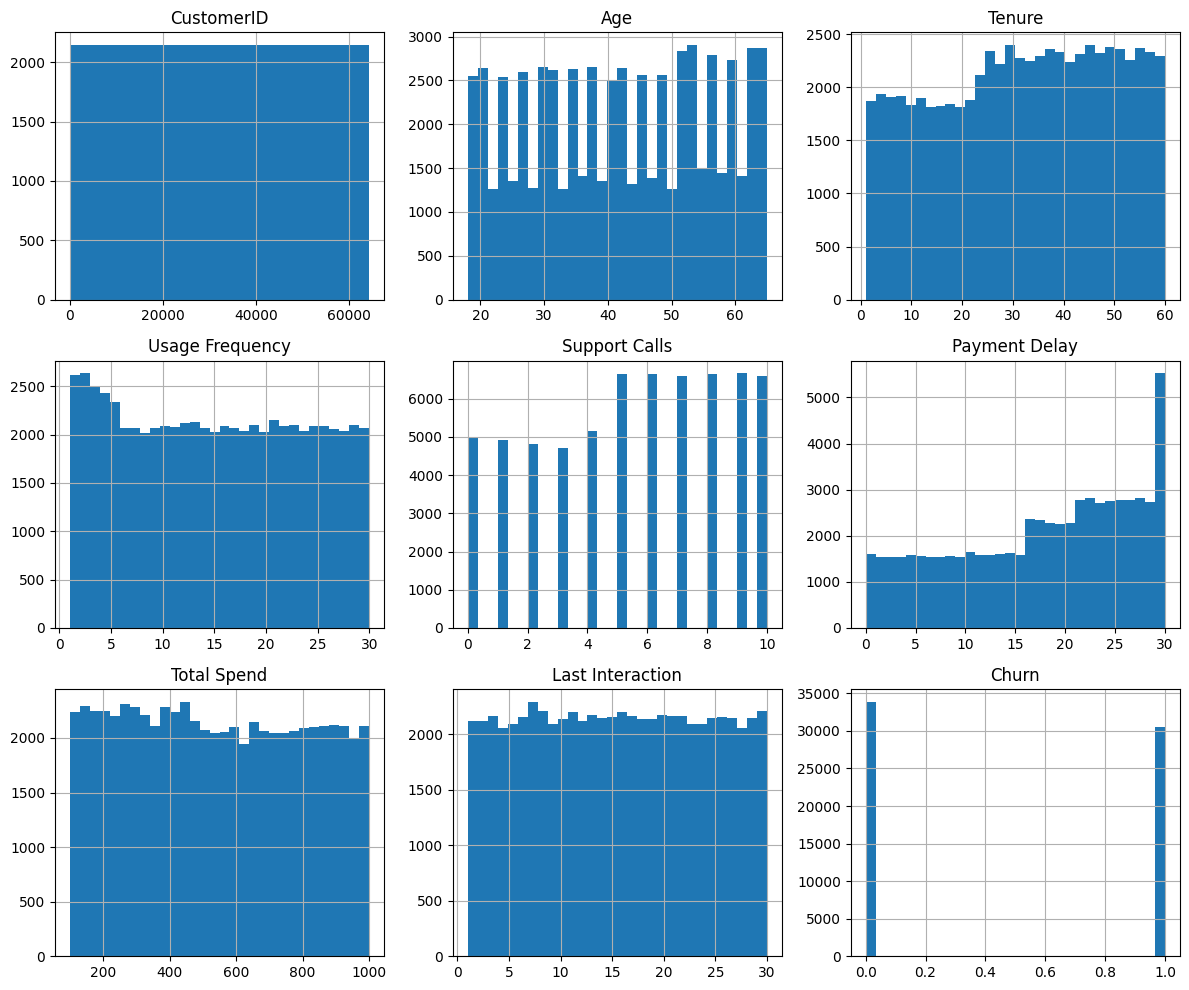

In [10]:
## هنا بنرسم بيانيا الأعمدة مع نفسها، يعني بشوف توزيع الداتا في كل عمود بيانات

numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols].hist(figsize=(12,10), bins=30)
plt.tight_layout()
plt.show()

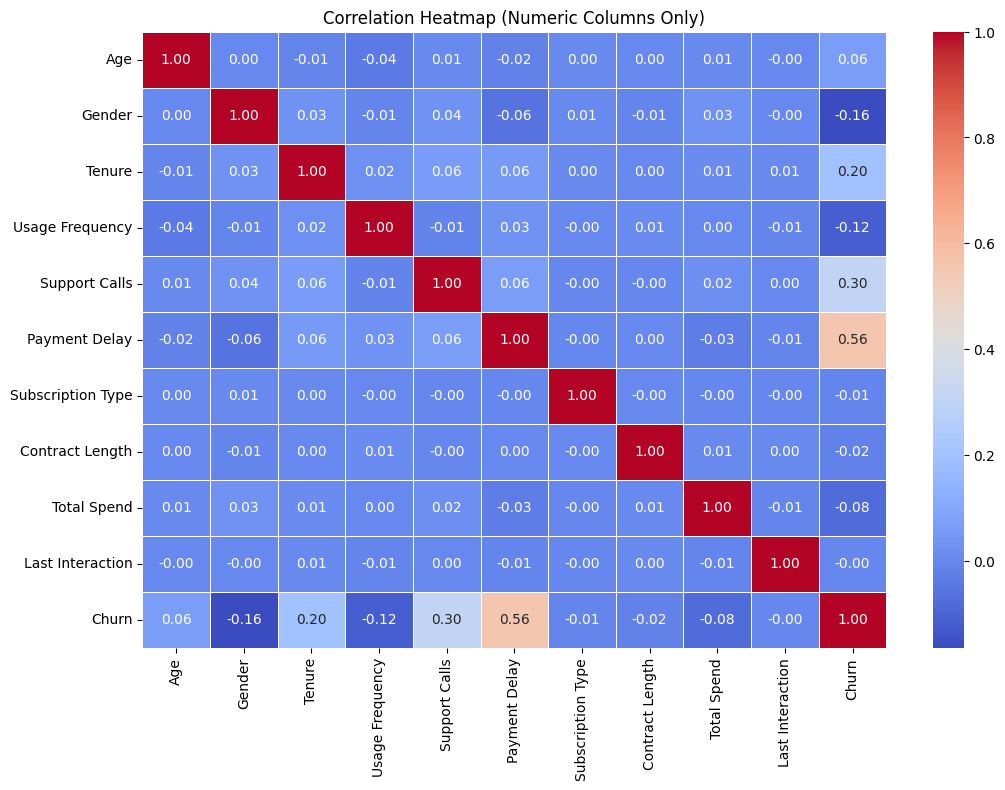

In [11]:
## هنا بعمل الheat map
## ودي وصف لكل عمود وعلاقته بالأعمدة الأخرى.
## 

df = df.drop(columns=['CustomerID'])
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])
corr = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()

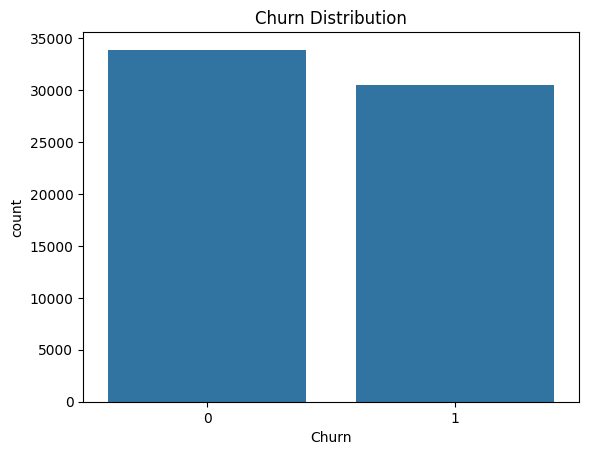

In [12]:
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

In [13]:
## هنا رسمة الشيرن بناءا على الجيندر
px.histogram(df, x='Gender', color='Churn', barmode='group')


In [14]:
# هنا رسمة الشيرن بناءا على نوع الاشتراك

## وقفت هنا، شوف بقى لو في أضافات عندك ولا تعديلات
# ومش متأكد برضوا الحقيقة إحنا كدا خلاص ولا مفروض نعمل حاجة كمان كتحيليل مبدئي.

px.histogram(df, x='Subscription Type', color='Churn', barmode='group')

## Exploring feature distributions

C:\Users\Yusoyu\AppData\Local\Temp\ipykernel_8672\2255592705.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




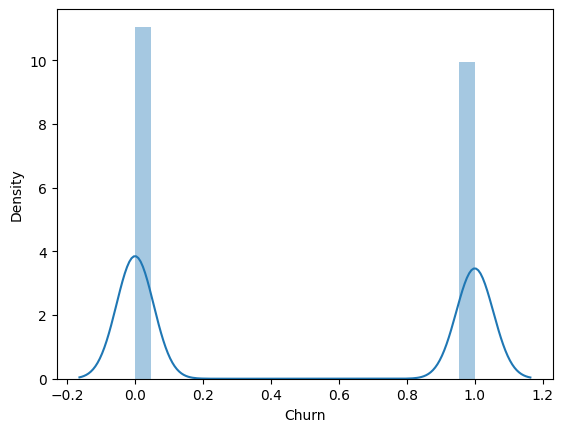

C:\Users\Yusoyu\AppData\Local\Temp\ipykernel_8672\2255592705.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




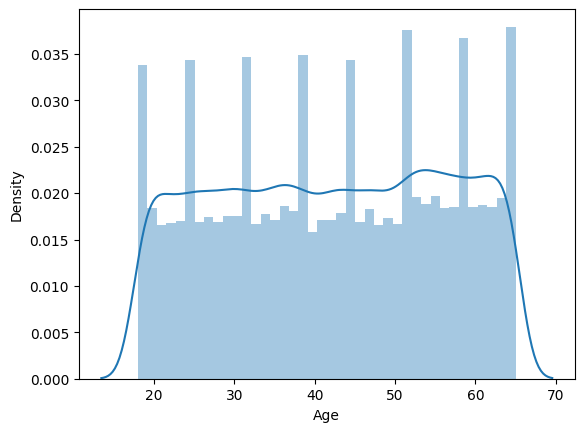

C:\Users\Yusoyu\AppData\Local\Temp\ipykernel_8672\2255592705.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




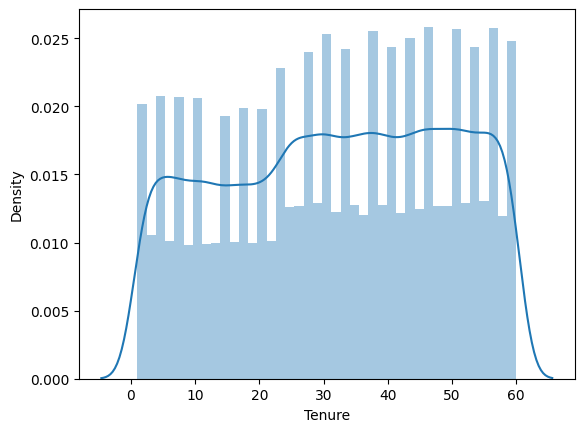

In [21]:
# use the correct column name (capital 'C') and the modern seaborn API
sns.distplot(df['Churn'], kde=True)
plt.show()
sns.distplot(df['Age'], kde=True)
plt.show()
sns.distplot(df['Tenure'], kde=True)
plt.show()

## Customer service calls and churn

<Axes: xlabel='Churn', ylabel='Support Calls'>

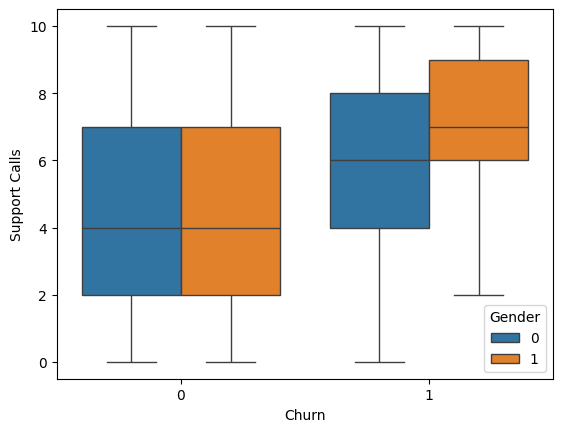

In [24]:
# Create the box plot 
sns.boxplot(x='Churn',
            y='Support Calls',
            data=df,
            showfliers=False,
            hue='Gender')

## visualize the differences in account length between churners and non-churners.


<Axes: xlabel='Churn', ylabel='Contract Length'>

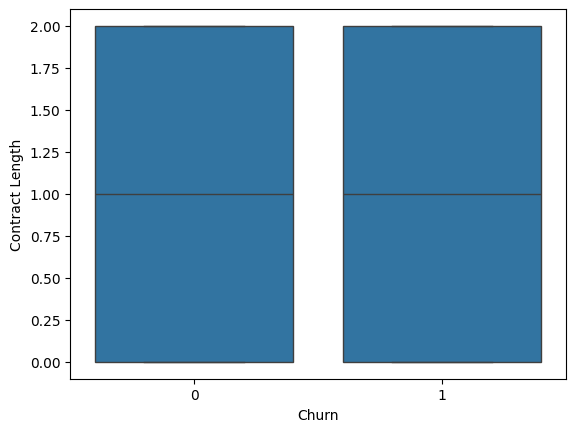

In [26]:
# Create the box plot 
sns.boxplot(x='Churn',
            y='Contract Length',
            data=df,
            showfliers=False
            )

## Feature Engineering

In [ ]:
# Drop CustomerID as it's not useful for modeling
df.drop(columns=["CustomerID"], inplace=True)

# Define categorical and numerical columns
categorical_features = ["Gender", "Subscription Type", "Contract Length"]
numerical_features = ["Age", "Tenure", "Usage Frequency", "Support Calls", "Payment Delay", "Total Spend", "Last Interaction"]

# Create age bins
age_bins = [0, 25, 35, 45, 55, 65, 100]
age_labels = ["<25", "25-35", "35-45", "45-55", "55-65", "65+"]
df["AgeGroup"] = pd.cut(df["Age"], bins=age_bins, labels=age_labels)

# One-hot encode AgeGroup
df = pd.get_dummies(df, columns=["AgeGroup"], drop_first=True)

# One-hot encode categorical features
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Create interaction features using polynomial combinations of numerical features (degree=2)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
interaction_features = poly.fit_transform(df[numerical_features])
interaction_feature_names = poly.get_feature_names_out(numerical_features)

# Create a DataFrame for interaction features
interaction_df = pd.DataFrame(interaction_features, columns=interaction_feature_names)

# Drop original numerical features and replace with scaled versions
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(df[numerical_features])
scaled_df = pd.DataFrame(scaled_numerical, columns=numerical_features)

# concatenate scaled and interaction features
df = pd.concat([df, scaled_df, interaction_df], axis=1)
# Drop original numerical columns 
df.drop(columns=numerical_features, inplace=True)

# Save the engineered dataset
df.to_csv("customer_churn_feature_engineered.csv", index=False)
